In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from helper_code import *
import plotly.express as px

In [2]:
columns_of_interest = ['age', 'educ2', 'web1a', 'web1b', 'web1c', 'sns2a', 'sns2b', 'sns2c']

In [4]:
# Load the data
data_2018 = pd.read_csv('datasets/Jan-25-Feb-8-2021-Core-Trends-Survey/Jan 25-Feb 8, 2021 - Core Trends Survey - CSV.csv')
data_2019 = pd.read_csv('datasets/January 3-10, 2018 - Core Trends Survey/January 3-10, 2018 - Core Trends Survey - CSV.csv')
data_2021 = pd.read_csv('datasets/January-8-February-7-2019-Core-Trends-Survey-SPSS/January 8-February 7, 2019 - Core Trends Survey - CSV.csv')

In [5]:
# Extract the relevant data
data_2018 = data_2018[columns_of_interest]
data_2019 = data_2019[columns_of_interest]
data_2021 = data_2021[columns_of_interest]

In [6]:
# Combine the data from different years
combined_data = pd.concat([data_2018, data_2019, data_2021])

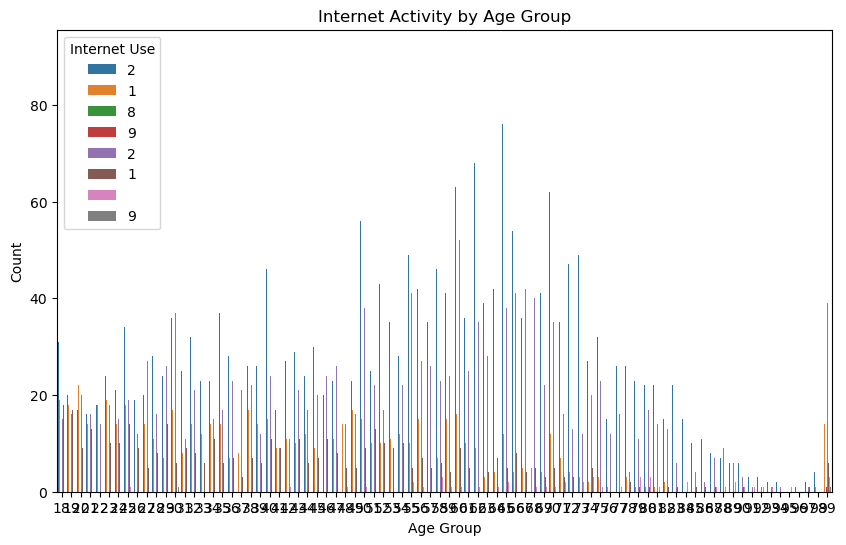

In [7]:
# Visualization: Age Group Technology Engagement
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='web1a', data=combined_data)
plt.title('Internet Activity by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Internet Use')
plt.show()

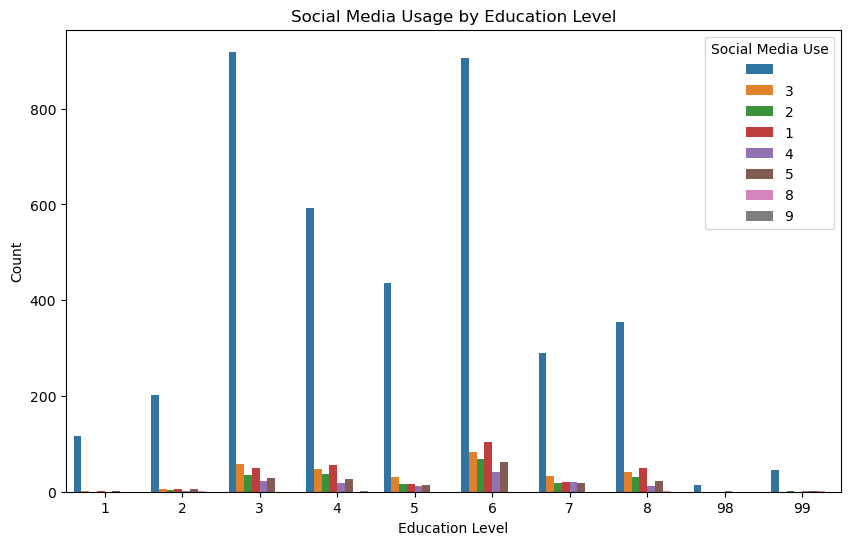

In [8]:
# Visualization: Education Level and Technology Engagement
plt.figure(figsize=(10, 6))
sns.countplot(x='educ2', hue='sns2a', data=combined_data)
plt.title('Social Media Usage by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Social Media Use')
plt.show()